# Infosys Springboard Python Data Analyst Statistical Computing using Python

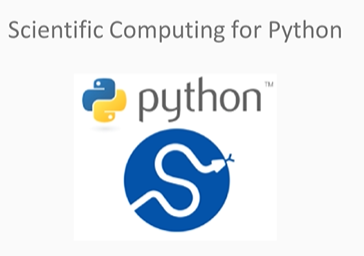

# Project : Alcohol consumption of students

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, arange
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
student = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')

In [4]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
student.rename(columns = {'sex':'gender'}, inplace = True)
student['alcohol_index'] = (5*student['Dalc'] + 2 * student['Walc'])/7

student['acl'] = student['alcohol_index'] <= 2
student['acl'] = student['acl'].map({True: 'Low', False: 'High'})

## Confidence Intervals

### [A] Confidence interval for the mean of the final grade

In [6]:
sample_size = student.shape[0]
print(sample_size)

395


In [7]:
sample_mean_grade = student['G3'].mean()
sample_mean_grade

10.415189873417722

In [8]:
std_error_grades = student['G3'].std()/sqrt(sample_size)

In [9]:
stats.norm.interval(0.95, loc = sample_mean_grade, scale = std_error_grades)

(9.963384081560339, 10.866995665275105)

In [10]:
student['acl'].value_counts(normalize = True)

acl
Low     0.736709
High    0.263291
Name: proportion, dtype: float64

In [11]:
high_prop = student['acl'].value_counts(normalize = True)['High']
std_error_prop = sqrt(high_prop * (1-high_prop)/sample_size)

In [12]:
stats.norm.interval(0.98, loc = high_prop, scale = std_error_prop)

(0.2117395356933005, 0.3148427427877122)

In [13]:
stats.binom.pmf(k=5, n=10, p=0.25)

0.058399200439453146

In [14]:
def plot_probs_n(n):
    fig, ax = plt.subplots(1,2, figsize = (14,5))
    ax[0].bar(x=arange(n+1), height=stats.binom.pmf(k=arange(n+1), n=n, p=0.25))
    ax[0].set_xticks(arange(n+1))
    ax[0].set_title('Probability mass function')
    
    ax[1].plot(stats.binom.cdf(k=arange(n+1), n=n, p=0.25))
    ax[1].set_xticks(arange(n+1))
    ax[1].set_title('Cumilative Distribution Function')

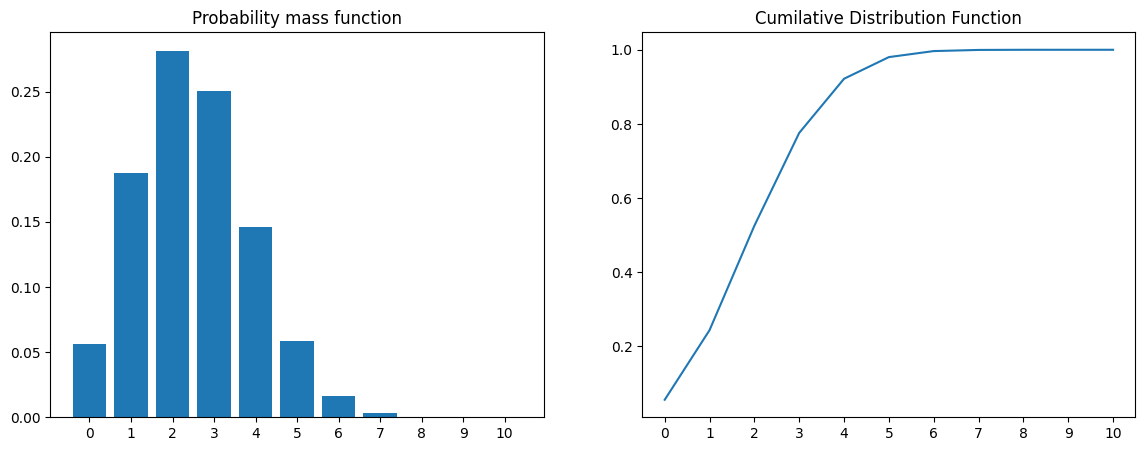

In [15]:
plot_probs_n(10)

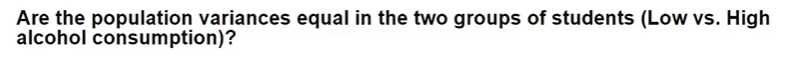

In [16]:
student.groupby('acl')['G3'].var()

acl
High    15.504761
Low     22.922218
Name: G3, dtype: float64

In [17]:
grades_low_acl = student['G3'][student['acl'] == 'Low']
grades_high_acl = student['G3'][student['acl'] == 'High']
stats.bartlett(grades_low_acl, grades_high_acl)

BartlettResult(statistic=5.42092012341391, pvalue=0.01989687176570536)

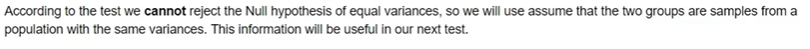

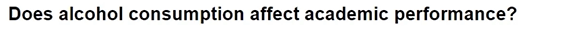

<Axes: xlabel='acl', ylabel='G3'>

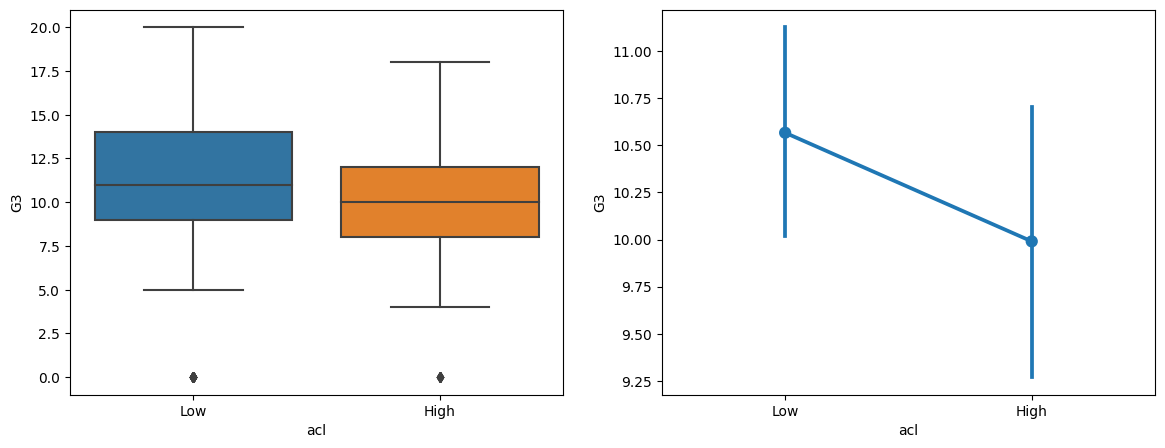

In [18]:
fig, axes = plt.subplots(1,2, figsize = (14,5))
sns.boxplot(x = 'acl', y = 'G3', data = student, ax = axes[0])
sns.pointplot(x = 'acl', y = 'G3', data = student, ax = axes[1])

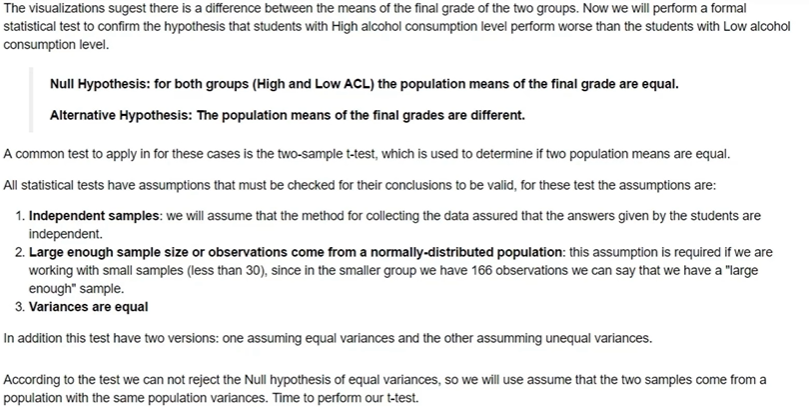

In [19]:
stats.ttest_ind(grades_low_acl, grades_high_acl, equal_var = True)

TtestResult(statistic=1.1019819150934829, pvalue=0.2711439431805995, df=393.0)

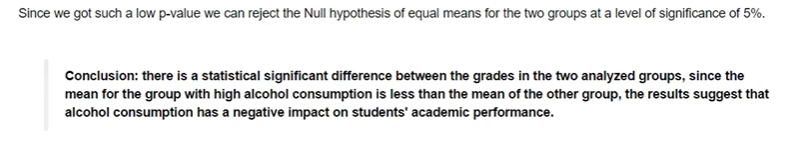

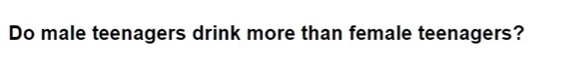

<Axes: title={'center': 'Alcohol Consumption Level'}, xlabel='acl'>

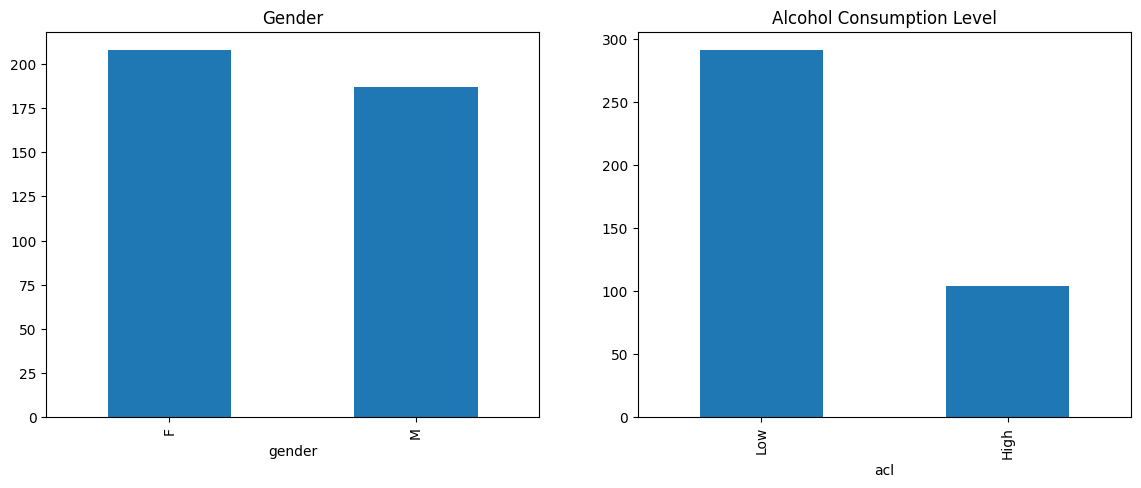

In [20]:
fig, axes = plt.subplots(1,2, figsize = (14,5))
student['gender'].value_counts().plot(kind='bar', ax=axes[0], title = 'Gender')
student['acl'].value_counts().plot(kind='bar', ax=axes[1], title = 'Alcohol Consumption Level')

In [21]:
gender_acl_table = pd.crosstab(student['acl'], student['gender'])
gender_acl_table

gender,F,M
acl,,
High,36,68
Low,172,119


<Axes: xlabel='acl'>

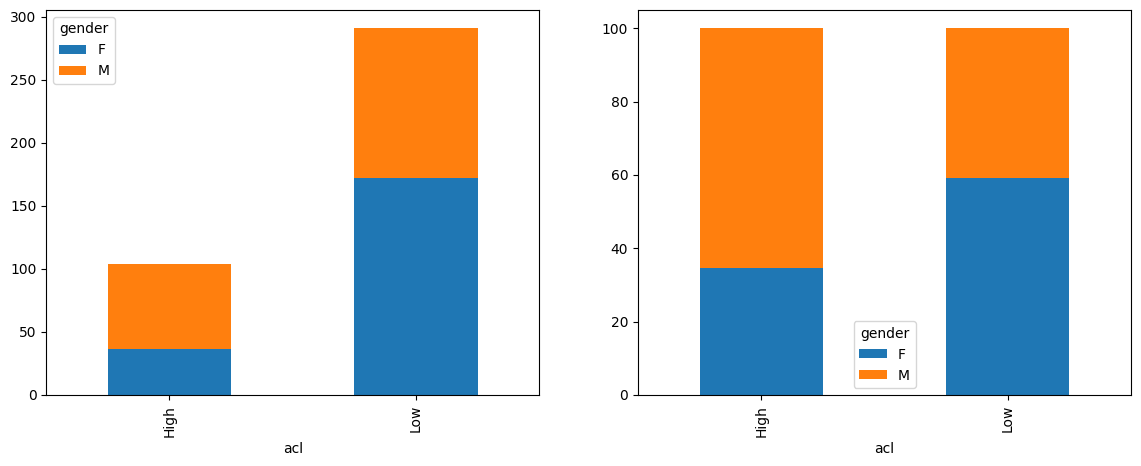

In [22]:
fig, axes = plt.subplots(1,2, figsize = (14,5))
gender_acl_table.plot(kind='bar', stacked=True, ax=axes[0])
(100 * (gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, ax=axes[1])

In [23]:
chi_stat, p_value, dof, expected = stats.chi2_contingency(gender_acl_table)

In [24]:
p_value

2.9258590692106244e-05

In [25]:
expected_table = pd.DataFrame(expected, index = ['High', 'Low'], columns = ['F','M'])
expected_table

,F,M
High,54.764557,49.235443
Low,153.235443,137.764557


<Axes: title={'center': 'Expected Under No Relation'}>

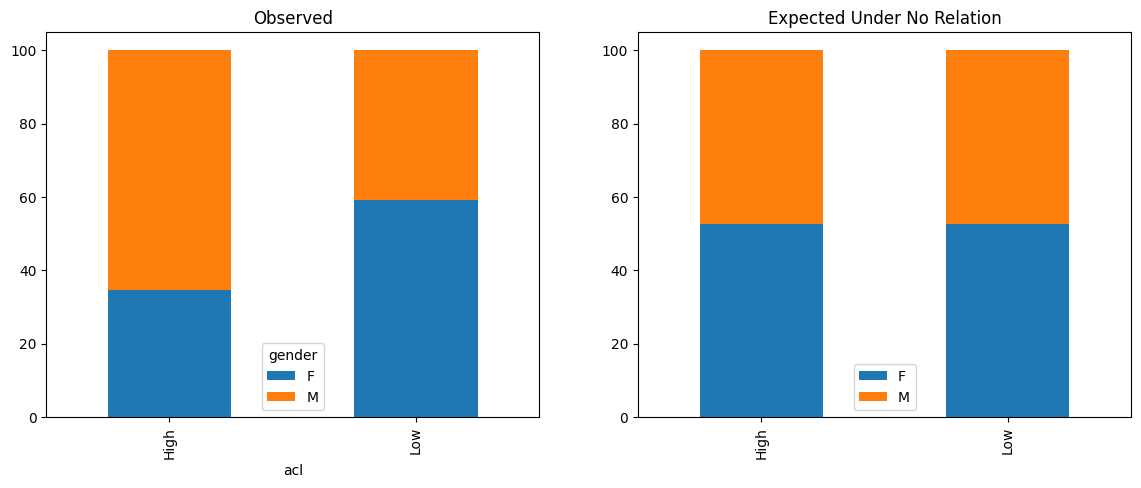

In [26]:
fig, axes = plt.subplots(1,2, figsize = (14,5))
(100 * (gender_acl_table.T/gender_acl_table.apply(sum, axis = 1)).T).plot(kind='bar', stacked=True,
                                                                 title = 'Observed', ax = axes[0])

(100 * (expected_table.T/expected_table.apply(sum, axis = 1)).T).plot(kind='bar', stacked=True,
                                            title = 'Expected Under No Relation', ax = axes[1])